<a href="https://colab.research.google.com/github/Estrada-John/FakeJob_Description_Prediction/blob/master/FakeJob_Description_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>ECE 49500/59500 Machine Learning</center>
### <center>Sping 2020 </center> 
## <center>Fake Job Classification using using Naive Bayes Classifier</center> 

The following line Install NLTK outline for installing NLTK. NLTK is a set of libraries for Natural Language Processing

In [1]:
! pip install nltk

In [1]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Step 1: Data Upload and Plot Data
Read xlsx file from google drive and store it in a pandas dataframe

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

jobPostings = pd.read_excel('gdrive/My Drive/Colab Notebooks/Machine Learning/fakeJob_Postings.xlsx' )

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


#### Display Details about data
1. Information about data
2. Description head of the data

In [3]:
jobPostings = jobPostings.drop(['job_id','title','company_profile','description','benefits','has_company_logo','has_questions'], axis = 1)
print(jobPostings.info(),'\n\n')
print(jobPostings.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Ground_Truth  17880 non-null  int64 
 1   requirements  15147 non-null  object
dtypes: int64(1), object(1)
memory usage: 279.5+ KB
None 


   Ground_Truth                                       requirements
0             0  Experience with content management systems a m...
1             0  What we expect from you:Your key responsibilit...
2             0  Implement pre-commissioning and commissioning ...
3             0  EDUCATION:Â Bachelorâ€™s or Masterâ€™s in GIS,...
4             0  QUALIFICATIONS:RN license in the State of Texa...


#### Data Visualization
function: initCentroids 

Take the the picture previously save it in a 3D array an the K number of clusters

>Parameters:
1. Pie Chart
>> Percentage difference between real jobs and fake jobs

2. Bar Chart
>> Values comparison between real jobs and fake jobs


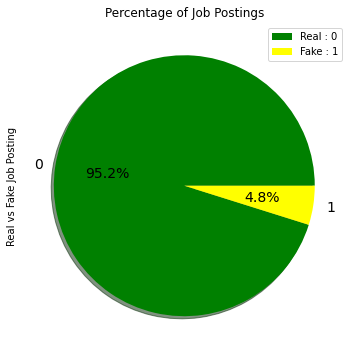

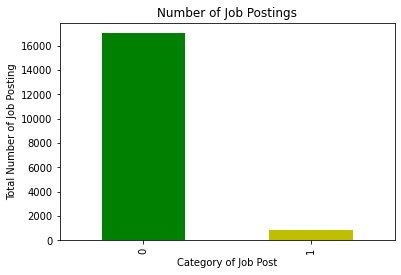

Real Jobs: 17014 | Fake Jobs: 866


In [4]:
import matplotlib.pyplot as plt

# Pie chart
jobPostings["Ground_Truth"].value_counts().plot(kind = 'pie', figsize = (6, 6), colors = ['green', 'yellow'], fontsize=14, autopct = '%1.1f%%', shadow = True)
plt.title('Percentage of Job Postings')
plt.ylabel("Real vs Fake Job Posting")
plt.legend(["Real : 0", "Fake : 1"])
plt.show()

# Bar plot
jobPostings["Ground_Truth"].value_counts().plot(kind='bar', stacked=True, color = tuple(['g', 'y']))
plt.title('Number of Job Postings')
plt.ylabel("Total Number of Job Posting")
plt.xlabel("Category of Job Post")
plt.show()
  ## Values of bars
gT = jobPostings['Ground_Truth'].value_counts()
a = [int(gT[0]),int(gT[1])]
print('Real Jobs: {} | Fake Jobs: {}'.format(a[0], a[1]))

### Step 2: Data Processing

In this section we will massage the raw messages (sequence of characters) into vectors (sequences of numbers).

#### Cleaning Data

We need to remove any type of stopping words such as ', . "'

In [0]:
jobPostings['requirements'] = jobPostings['requirements'].str.replace(r'[^\w\s]+', '')

In [7]:
jobPostings.groupby('Ground_Truth').describe()

requirements  ...     
                    count  ... freq
Ground_Truth               ...     
0                   14438  ...  410
1                     709  ...   22

[2 rows x 4 columns]

#### Tokenize Data and Normalize Data

1. We will use a bag-of-words approach to make unique words be represented by a one number 
2. Using Natural Language Processing we will normalize text

In [14]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from textblob import TextBlob

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [0]:
def split_into_tokens(message):
    message = str(message.encode('utf8'))  # convert bytes into proper unicode
    return TextBlob(message).words

In [15]:
# Original text
jobPostings.requirements.head()

0    Experience with content management systems a m...
1    What we expect from youYour key responsibility...
2    Implement precommissioning and commissioning p...
3    EDUCATIONÂ Bachelorâs or Masterâs in GIS busin...
4    QUALIFICATIONSRN license in the State of Texas...
Name: requirements, dtype: object

In [16]:
# Tokenized text
jobPostings.requirements.head().apply(split_into_tokens)

0    [b'Experience, with, content, management, syst...
1    [b'What, we, expect, from, youYour, key, respo...
2    [b'Implement, precommissioning, and, commissio...
3    [b'EDUCATION\xc3\x82\xc2\xa0Bachelor\xc3\xa2s,...
4    [b'QUALIFICATIONSRN, license, in, the, State, ...
Name: requirements, dtype: object

In [18]:
# Normalized data in their base form
def split_into_lemmas(message):
    message = str(message.encode('utf8')).lower()
    words = TextBlob(message).words
    # for each word, take its "base form" = lemma 
    return [word.lemma for word in words]

jobPostings.requirements.head().apply(split_into_lemmas)

0    [b'experience, with, content, management, syst...
1    [b'what, we, expect, from, youyour, key, respo...
2    [b'implement, precommissioning, and, commissio...
3    [b'education\xc3\x82\xc2\xa0bachelor\xc3\xa2s,...
4    [b'qualificationsrn, license, in, the, state, ...
Name: requirements, dtype: object

### Step 3: Training a model detecting spam

With messages represented as vectors, we can finally train our spam/ham classifier. This part is pretty straightforward, and there are many libraries that realize the training algorithms.

1. We need to split data in training and test
2. We'll be using scikit-learn here, choosing the Naive Bayes classifier to start with:

In [19]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

features_np = CountVectorizer(analyzer=split_into_lemmas).fit_transform(jobPostings['requirements'].values.astype('U'))
features_np

<17880x83786 sparse matrix of type '<class 'numpy.int64'>'
	with 982483 stored elements in Compressed Sparse Row format>

In [20]:
category_np = jobPostings['Ground_Truth'].to_numpy()
category_np

array([0, 0, 0, ..., 0, 0, 0])

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_np, category_np, stratify = category_np, test_size = 0.3, random_state=1)
X_train.shape
print("The size of fake jobs:",gT[0])
print("The sie of real jobs:",gT[1])
print("The size of total samples:",features_np.shape[0])
print("The size of training samples:",X_train.shape[0])
print("The size of testing data:",X_test.shape[0])

The size of fake jobs: 17014
The sie of real jobs: 866
The size of total samples: 17880
The size of training samples: 12516
The size of testing data: 5364


In [0]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
# fit data
clf.fit(X_train, y_train)
MultinomialNB()
pred = clf.predict(X_test)

### Step 4: Accuracy

We need to compare the predicted values with the real values.
Two implementations for accuracy

1. Using for loop and comparing this real and fake outputs
2. Funcion accuracy_score from sklearn library

In [23]:
from sklearn.metrics import accuracy_score

count = 0
for i in range (0, X_test.shape[0]):
    if pred[i] == y_test[i]:
         count += 1
print ("accuracy:",count/y_test.shape[0])

score=accuracy_score(pred,y_test)
score

accuracy: 0.948173005219985


0.948173005219985

### Summary

Overall my implementation of finding fake job posting is good. Using built-in libraries for ml algorithm allows me to explore new functions and ways of implementation of ml algorithms. A learn how to plot data so the use can have a better picture of which data is being process and how the values will impact in the final result. Furthermore, I learned how to process data by using bag-of-words approach and vectorizing the data so the libraries of ml can work in a better way. Finally, I was able to applied what we learn in class of splitting data in training and testing set and getting accuracy for the training model.

One big implementation that I was trying to keep as low as possible was the memory RAM and disk usage. I was looking for libraries and implementation so my code can do a good performance without taking to many computer resources. As my code succesfully completed the requirents for the project the final usage of the compute engine backend were:
RAM: 1.13GB / 25.51GB
DISK: 31.01GB / 107.77GB

In conclusion I would like to have a low disk usage by using other algorithms but this is a intro to ml so I am comfortable with my results. <b>Thank you professor for giving us a extension deadline and I hope my project met your critiria for this project.</b>


best,

John Estrada